# Test unitaire - Activité 2

---
Nom :

Prénom :

Groupe de TP :

---

Le teste unitaire, `tu_Activite2.ipynb`, de l'activité consiste à mettre en place un programme qui permet de :
1. importer des données au format JSON disponibles en OpenData,
1. afficher les données sous forme d'un tableau,
1. analyser les données.
1. publier les résultats.

📂 Les données à traiter au format JSON sont celles disponibles sur le site de l'[*Open Data du service Vélib' Métropole*](https://www.velib-metropole.fr/donnees-open-data-gbfs-du-service-velib-metropole).

Ces données sont de deux types :
* des **données dites statiques** qui informent sur les caractéristiques des stations Vélib sur l'agglomération Parisienne,
* des **données dites dynamiques** qui informent en "temps réel" sur la disponibilité des stands et des vélos pour chaque station. Ces informations sont mises à jour toutes les minutes.

Il est possible de voir la structure de ces données au format JSON en cliquant sur les liens ci-dessous :

> 👁 Lien vers le JSON des [données statiques](
https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json).<br/>
👁 Lien vers le JSON des [données dynamiques](https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_status.json).

## Préambule 

Avant toute chose, il faut importer les bibliothèques et modules utiles :

> ⛔ ne pas modifier le code donné ci-dessous.

In [ ]:
# importations et configuration
#

# installation de modules non natifs
!pip install geopandas
!pip install contextily

from google.colab import drive # pour l'accès au drive
import sys                     # pour l'accès au commandes système
import json                    # pour manipuler le format JSON
import pandas as pd            # pour extraire, calculer, publier

# montage du drive sur Colab (avec autorisation d'accès)
drive.mount('/content/drive', force_remount=True)
# cliquez sur le lien affiché dans la console afin d'obtenir votre clé d'accès
# et recopiez cette clé dans la zone de saisie de texte.

# pour inclure les fonctions "faites maison" et spécifiques
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/SAE15/tools')
import sae15_tools as tools 
import sae15_spec as spec

## Lecture des données statiques

Lire les **données statiques** au format JSON disponibles en OpenData de l'API Velib. Récupérer les informations sur les différentes stations à vélos. Convertir et afficher la structure JSON en Data Frame à l'aide de la bibiliothèque Pandas.

1. `tools.loadVelibInformation()` ➡ données statiques complètes aux format JSON
1. `tools.getVelibStations()` ➡ données sur les stations Vélib
1. `pandas.DataFrame()` ➡ mise sous forme d'un Data Frame
1. `display()` ➡ affichage amélioré


In [ ]:
# chargement des données statiques Velib depuis l'OpenData 

data = tools.loadVelibInformation()
# sélection des données des différentes stations

stations = data['data']['stations']
# transformation en DataFrame pour analyse
stations_frame = pd.DataFrame(stations)
# affichage amélioré
display(stations_frame)

station_id  ... rental_methods
0       213688169  ...            NaN
1       516709288  ...            NaN
2           36255  ...   [CREDITCARD]
3        37815204  ...            NaN
4       100769544  ...   [CREDITCARD]
...           ...  ...            ...
1441  11437706131  ...            NaN
1442  13373848216  ...            NaN
1443  13373712848  ...   [CREDITCARD]
1444  13373801574  ...   [CREDITCARD]
1445  13373758036  ...            NaN

[1446 rows x 7 columns]

## Lecture des données dynamiques

Lire les **données dynamiques** au format JSON disponibles en OpenData de l'API Velib. Récupérer les informations sur les différentes stations à vélos. Convertir et afficher la structure JSON en Data Frame à l'aide de la bibiliothèque Pandas.

1. `tools.loadVelibSatus()` ➡ données dynamiques complètes aux format JSON
1. `tools.getVelibStations()` ➡ données sur les stations Vélib
1. `pandas.DataFrame()` ➡ mise sousforme de Data Frame
1. `display()` ➡ affichage amélioré

In [ ]:
# chargement des données dynamiques Velib depuis l'OpenData 
dyn_data = tools.loadVelibStatus()
# sélection des données des différentes stations
stations = dyn_data['data']['stations']
# transformation en DataFrame pour analyse
stations_dyn_frame = pd.DataFrame(stations)
# affichage amélioré
display(stations_frame)

station_id  ... rental_methods
0       213688169  ...            NaN
1       516709288  ...            NaN
2           36255  ...   [CREDITCARD]
3        37815204  ...            NaN
4       100769544  ...   [CREDITCARD]
...           ...  ...            ...
1441  11437706131  ...            NaN
1442  13373848216  ...            NaN
1443  13373712848  ...   [CREDITCARD]
1444  13373801574  ...   [CREDITCARD]
1445  13373758036  ...            NaN

[1446 rows x 7 columns]

## Analyse des données dynamiques

Comme on peut le voir sur l'affichage précédent, chaque station est constituée de différentes rubriques : `stationCode`, `station_id`, `num_bikes_available`,	`numBikesAvailable`, `num_bikes_available_types`, `num_docks_available`, `numDocksAvailable`, `is_installed`, `is_returning`, `is_renting`, `last_reported`.

Ici, nous nous intéresserons aux colonnes `numBikesAvailable` et  `numDocksAvailable` qui indiquent respectivement le nombre de vélos et de stands disponibles pour une station donnée.

On demande de produire des mesures qui indiquent :
1. le nombre total de stations de stands à vélos,
1. le nombre total de vélos disponibles sur l'ensemble des stations,
1. le nombre total de stands à vélos disponibles sur l'ensemble des stations,
1. le taux de disponibilité des vélos (en pourcentage) de chaque station : $taux=velos_{dispo}/(velos_{dispo}+stands_{dispo})$,
1. le taux moyen de disponibilité des vélos.

Chacune de ces mesures devra être mémorisée dans une variable numérique.

In [ ]:
# analyser les données dynamiques
#
total_stands = stations_dyn_frame.numBikesAvailable.count()

# récupération de la colonne 'numBikesAvailable'
available_bikes = stations_dyn_frame.numBikesAvailable.sum()
# récupération de la colonne 'numDocksAvailable'
available_docks = stations_dyn_frame.numDocksAvailable.sum()
# mesures statistiques obtenues par les méthodes de Pandas


############ LISTES POUR COMPTER ET FAIRE UNE CORRESPONDANCE ***Code -> Taux***²
stations_code = stations_dyn_frame.stationCode
num_bikes = stations_dyn_frame.numBikesAvailable
num_docks = stations_dyn_frame.numDocksAvailable

rate_per_docks = []

for i in range(total_stands):
  rate_per_docks.append( (num_bikes[i]/(num_bikes[i] + num_docks[i]))*100 )

rate_per_dock = []

for i in range(total_stands):
  rate_per_dock.append({'Code Station':stations_code[i], 'Taux':rate_per_docks[i]})


display(pd.DataFrame(rate_per_dock).fillna(0))


# taux de disponibilité

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars


Code Station       Taux
0           16107  14.705882
1           11104  11.111111
2            9020  19.047619
3           12109  28.571429
4            5001  97.674419
...           ...        ...
1441        34012   0.000000
1442        31303   0.000000
1443        21514   0.000000
1444        31301   0.000000
1445        23204   0.000000

[1446 rows x 2 columns]

⚠ attention : Avant de calculer le taux moyen de disponibilité, il faut remarquer que certaines stations indiquent des valeurs nulles pour `numBikesAvailable` et `numDocksAvailable`, ce qui produit une valeur du taux de disponibilité égale à `NaN` (résultat du calcul de 0/0). La velur `NaN` (pour *Not a Number*) doit donc être remplacée par 0 partout où elle apparaît avant de calculer le taux moyen.

> A cette fin, utiliser la méthode  [`pandas.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas-dataframe-fillna) de la bibliothèque Pandas.

In [ ]:
# remplacement des NaN par des 0 et calcul du taux moyen
#
filled_rate_per_dock = pd.DataFrame(rate_per_docks).fillna(0)
rate_mean = (filled_rate_per_dock.sum() / len(rate_per_dock))[0]
print('Taux Moyen de disponibilité : {}%'.format(rate_mean))


Taux Moyen de disponibilité : 38.0551405007894%


## Publication des résultats

Finalement, proposez une publication des mesures obtenues dans un format texte lisible et compréhensible. L'affichage se fait dans la console.

Nombre total de stands : 1446
Nombre total de vélos disponibles : 16531
Nombre total de stands disponibles : 26209

Taux de disponibilité par stations:


Code Station       Taux
0           16107  14.705882
1           11104  11.111111
2            9020  19.047619
3           12109  28.571429
4            5001  97.674419
...           ...        ...
1441        34012   0.000000
1442        31303   0.000000
1443        21514   0.000000
1444        31301   0.000000
1445        23204   0.000000

[1446 rows x 2 columns]

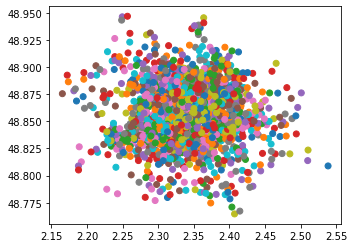

In [ ]:
# publier les résultats
#
print("Nombre total de stands : {}".format(total_stands))
print("Nombre total de vélos disponibles : {}".format(available_bikes))
print("Nombre total de stands disponibles : {}".format(available_docks))
print()
print("Taux de disponibilité par stations:")
display(pd.DataFrame(rate_per_dock).fillna(0))


print()
gdf = tools.exportToGeoDF(pd.DataFrame(stations_frame))
gdf.set_index('geometry')
gdf.plot("name",legend=False)

**Fonctions spécifiques**

---
🎯 Livrer ce test unitaire sur Eprel

---



